<a href="https://colab.research.google.com/github/pandasorceress/DataScienceProjects/blob/main/FDS_Project_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

In [ ]:
from google.colab import drive #import drive to pull in dataset
drive.mount('/content/drive')

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive #mount google drive to enable the loading and saving of files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv') #this loads my data from the drive
#df.head() #returns the first 5 rows
#df.head(10) # I set df.head() to show me the first 10 rows
df.info() #I want information on the dataframe including the column names, number of values, the types present and the total number of times those types occur
#df.describe().T
#df.describe(include= 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


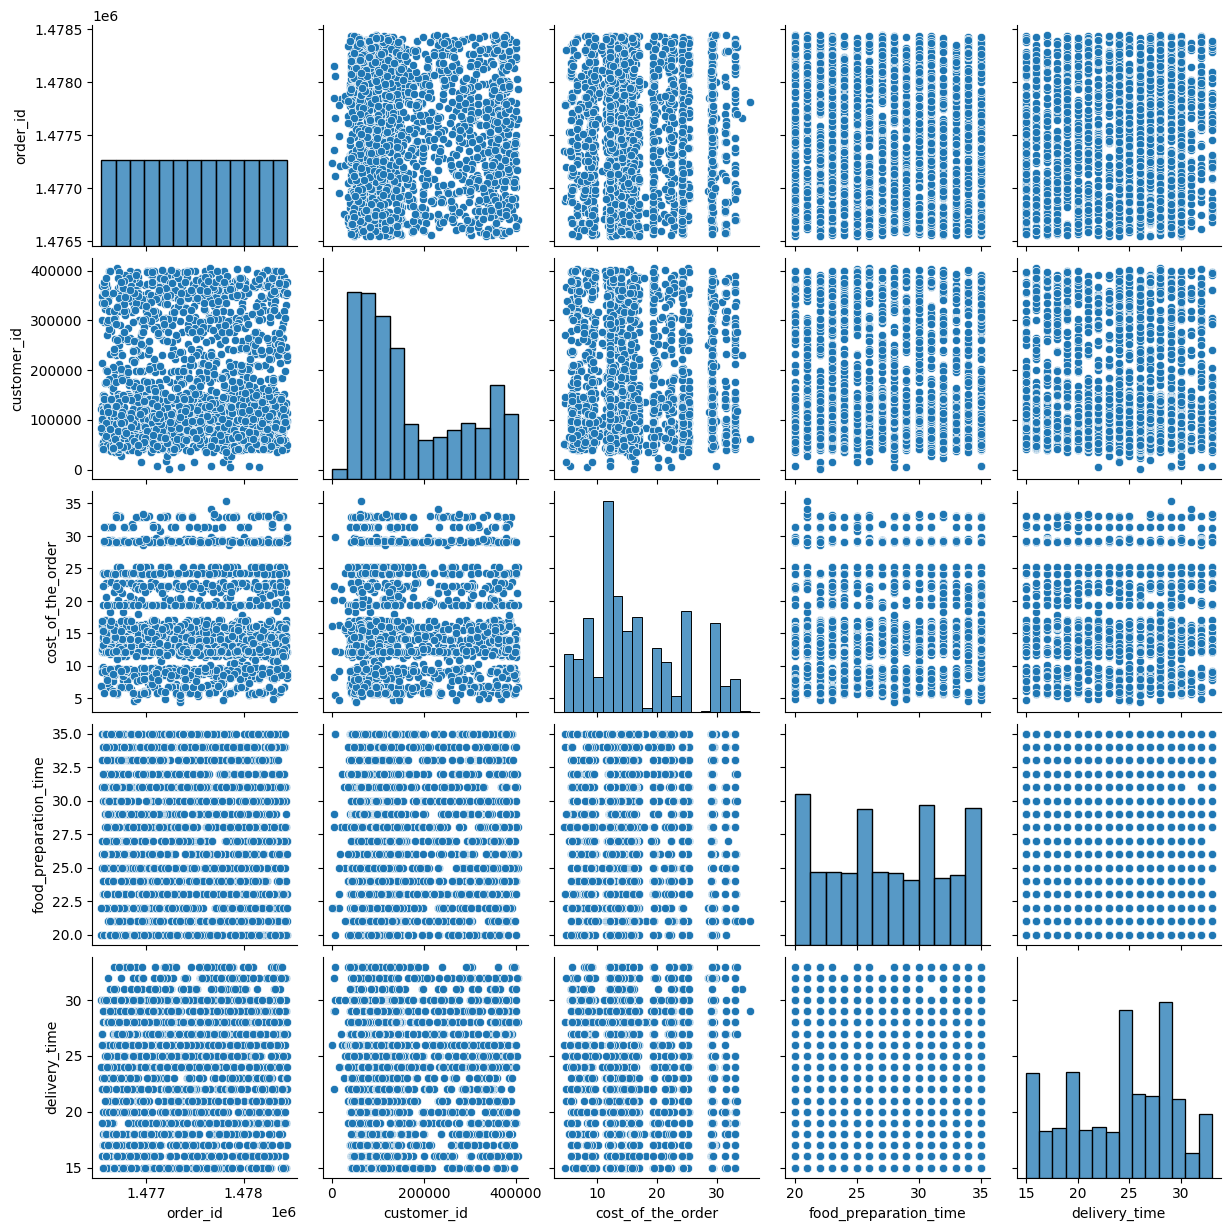

In [ ]:
sns.pairplot(df) #this plot shows me many different types of graphs to look at my data. I like to start here to get a full picture of what I am working with.

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
# Use df.info() to gather info on the dataset
df.info()
df.describe() #could also give us the information desired
# there are 1898 rows and 9 columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
# As seen above, we can get type() from df.info()
df.info()
#The types in the dataset are int, float, and object specifically int64, object, and float64.
#There is 1 float64 value. There are 4 int64 values, and there are 4 object values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#one way to find missing values is to separate the dataset into categorical and numerical variables.
#we can do this to make it easier to search for missing values in appropriate ways because there are different methods for searching through categorical and numerical variables
#To put the categorical variables (object type) together, we can use the dtype function to sort data types and the equality operator
df.dtypes == 'object'
#We see that the categorical values are returned as True. These are 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating'
#we can use df.columns in addition to our df.dtypes == 'object' line to save these columns to a variable
catvar = df.columns[df.dtypes == 'object'] #save to variable
catvar #call the variable to check

Index(['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'], dtype='object')

In [ ]:
#From here we can easily search for null values in catvar using isnull() and isnull().sum()
catvar.isnull() #returns False for all columns
catvar.isnull().sum() #returns 0 for all columns
#this is a helpful tool when sorting through different types of variables, but it is not always necessary

0

In [ ]:
# Write your code here
#We can search across alll columns to find missing values using df.isnull().sum() to get the total number of missing values for the dataset
df.isnull().sum()
#There are 0 missing values across all 9 columns and 1898 rows.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
#To find min, avg, and max, we can use df.describe(include= 'all') or df.describe()
#df.describe(include= 'all') seems to be too much data.
df.describe()
#The food_preparation)_time minimum is 20.000000 minutes, the maximum is one 35.000000 minutes, and the average (mean) is 27.371970 minutes


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
#another method for finding min, max, and mean (average) is aggregating for info on the specific column alone
df['food_preparation_time'].agg(['min', 'max', 'mean'])
#This shows the same result as above, but only shows us the result we were asked to retrieve. This could be more efficient at times.

min     20.00000
max     35.00000
mean    27.37197
Name: food_preparation_time, dtype: float64

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
#We need find the total number of orders, then the total ratings, and then total the missing values if any are found
df['order_id'].count() #shows total number of rows/values in 'order_id' which is the total number of orders, which is 1898



1898

rating
Not given    736
5            588
4            386
3            188
dtype: int64

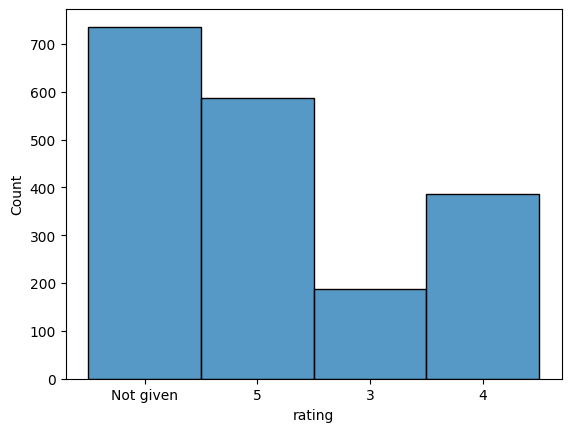

In [ ]:
#now we find the total number of ratings
#df['rating'] #display rating column. This shows that there are some orders with 'Not given' as the value, which means there is no rating.
#There are no missing values in the column, but there are ratings that were 'not given'
sns.histplot(x= df['rating']) #it looks like using a histogram to plot the 'rating' variable, we can find that the amount of 'Not given' values is over 700, closest to 750 it seems.
df.value_counts('rating') # using value_count(), we can find the number of unique values in a row and return it as a series with pandas. df.values_count('rating') shows us there are 736 'Not given' ratings so there are 736 ratings that are not rated.

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


<Axes: xlabel='delivery_time', ylabel='Count'>

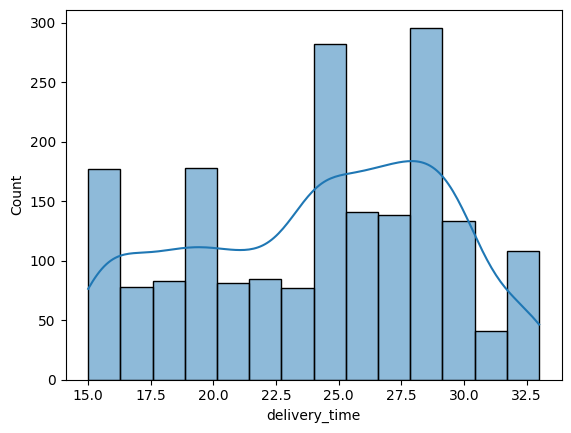

In [ ]:
# Write the code here
#sns.boxplot(df, x= 'delivery_time') testing which plot is most effective
sns.histplot(df, x= 'delivery_time', kde = True) #the histogram shows us the distribution for 'Delivery TIme' is not quite normal. It seems multimodal.

<Axes: xlabel='order_id', ylabel='Count'>

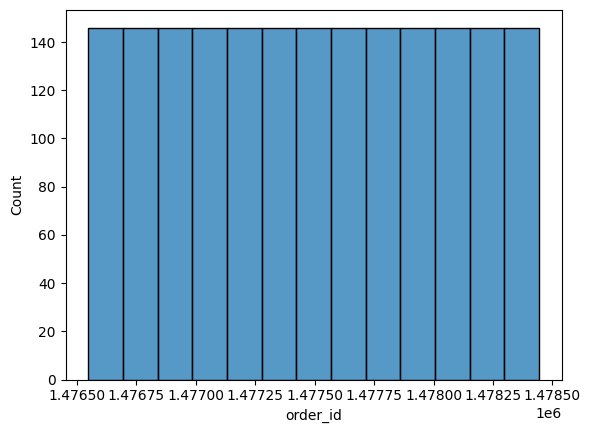

In [ ]:
df['order_id'] #totally random numbers contained in variable. It appears to be ascending.
#plot the variable to understand. It is probably uninfluenced by any other variable and constant in form. I doubt there is any variance in distribution to observe.
sns.histplot(df, x='order_id') #one of each id. There is no skew. It is constant.

<Axes: xlabel='customer_id', ylabel='Count'>

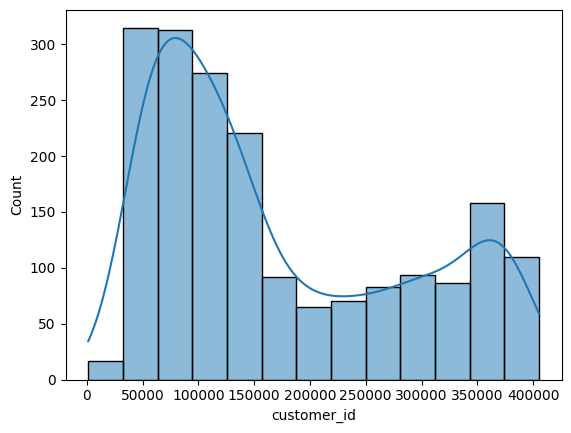

In [ ]:
df['customer_id'] #take a look at the data and find varying numbers associated with idea. No order is apparent.
#sns.boxplot(df, x='customer_id') #looking at a box plot, we do find there seems to be influenced by the amount of times a customer_id is used
#sns.countplot(df, x='customer_id') #we see lots of variance across how often customers order. Some consistency with the one-time users, and outliers on high-use customers.
sns.histplot(df, x='customer_id', kde=True) #most effective method of studying the variable. It seems the data looks cleaner here. The distrubtion seems right-skewed. It could be argued that this is multi-modal. Peaks at 10000 and 35000.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


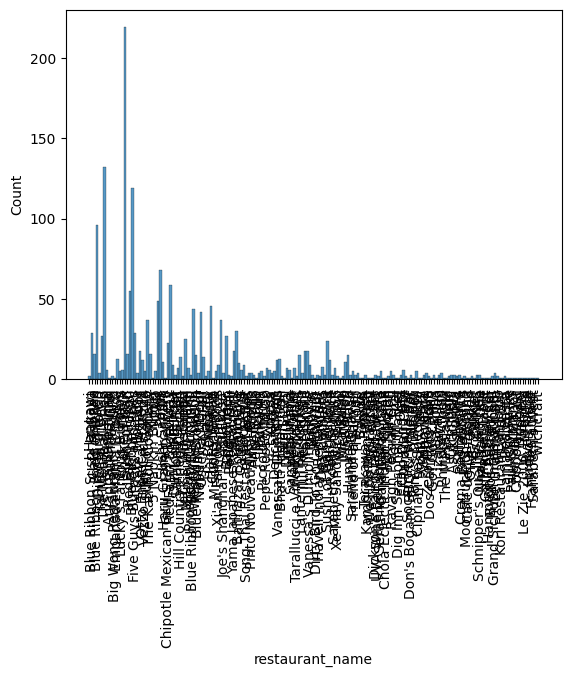

In [ ]:
#df['restaurant_name'] #look at values. Find they are strings, but some contain prices.
#sns.barplot(df, x='restaurant_name')
#plt.xticks(rotation=90)
sns.histplot(df, x='restaurant_name') #clearly shows some restaurants are ordered from more than others
plt.xticks(rotation=90) #the data here is not clean. It is hard to read and will need more treatment

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

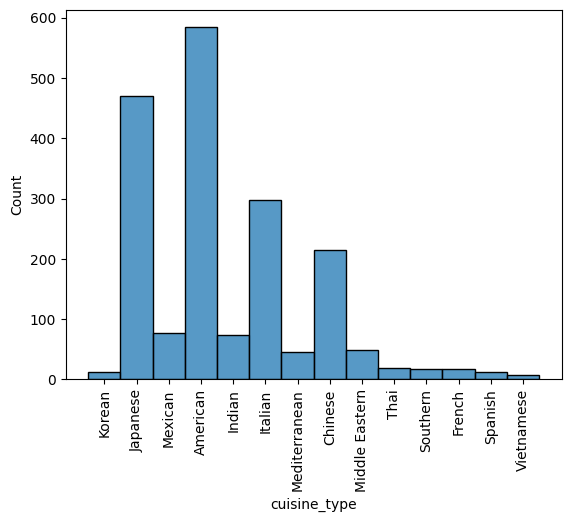

In [ ]:
df['cuisine_type']
sns.histplot(df, x='cuisine_type')
plt.xticks(rotation=90) #from this histogram plot we find that 'American', 'Japanese', and 'Italian' cuisine are the top three (DESC) cuisine types on the delivery app.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

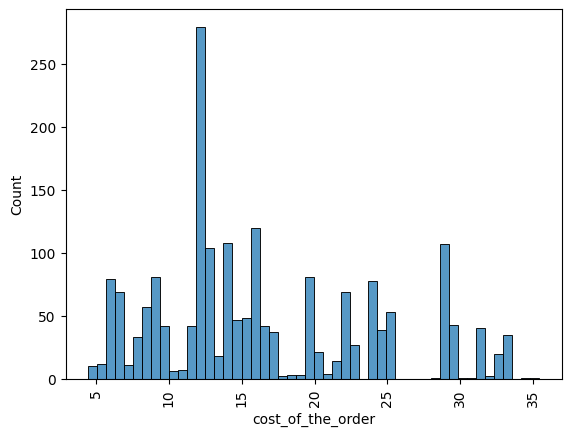

In [ ]:
df['cost_of_the_order']
sns.histplot(df, x='cost_of_the_order', bins=50)
plt.xticks(rotation=90) #plotted the variable and limitied bins to make the data more easily read. Here we can find the most repeated cost of an order is between 10-15 dollars, approximately 12 dollars.

<Axes: xlabel='day_of_the_week', ylabel='Count'>

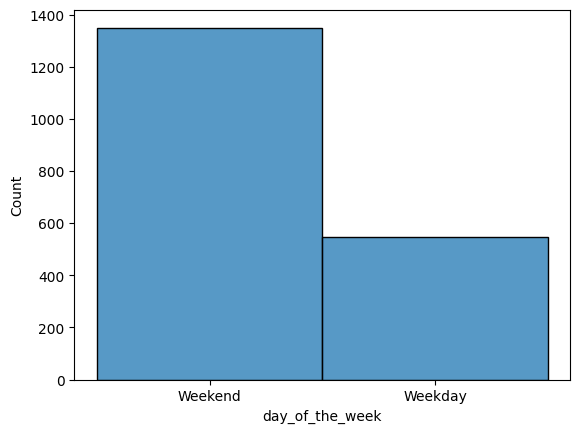

In [ ]:
df['day_of_the_week'] #we find the variable lists either 'weekday' or 'weekend' as the input value.
sns.histplot(df, x='day_of_the_week') #histplot shows us that more orders come on the weekend than on a weekday

<Axes: xlabel='rating', ylabel='count'>

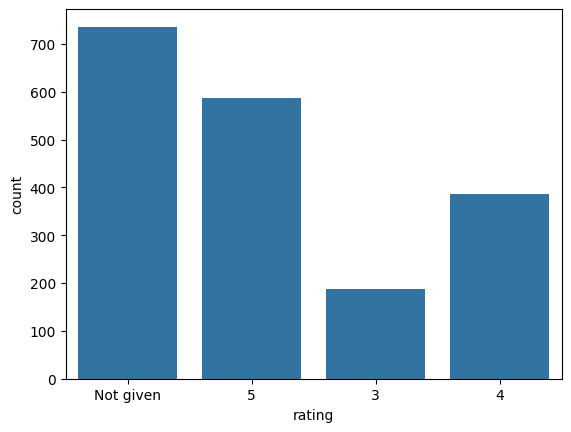

In [ ]:
df['rating'] #look at data and keep in mind that some of these ratings were 'Not given' (736 I believe)
sns.countplot(df, x='rating') #There are more 'missing' ratings than there are given ratings. The highest actual rating is 5 out of 5, then 4, then 3. It could be probable that the 'not given' ratings were particularly bad ratings, but this is not a smart assumption.

<Axes: xlabel='food_preparation_time', ylabel='Count'>

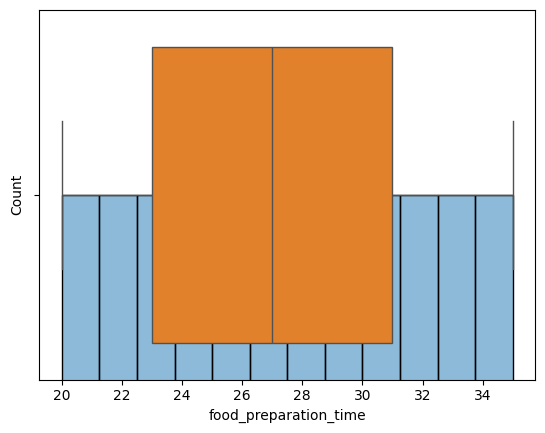

In [ ]:
sns.histplot(df, x= 'food_preparation_time', kde=True) #the variable is definitely multimodal with modes at 20, 26, 30, 34.
#this shows us that food preparation is somewhat consistent in a range of 20-34 minutes.
sns.boxplot(df, x='food_preparation_time') #the mean is around 27 minutes for food prep time

<ipython-input-30-0fc836fe953c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= df[['delivery_time', 'rating', 'order_id', 'restaurant_name', 'food_preparation_time','cuisine_type', 'cost_of_the_order', 'day_of_the_week',]].corr());


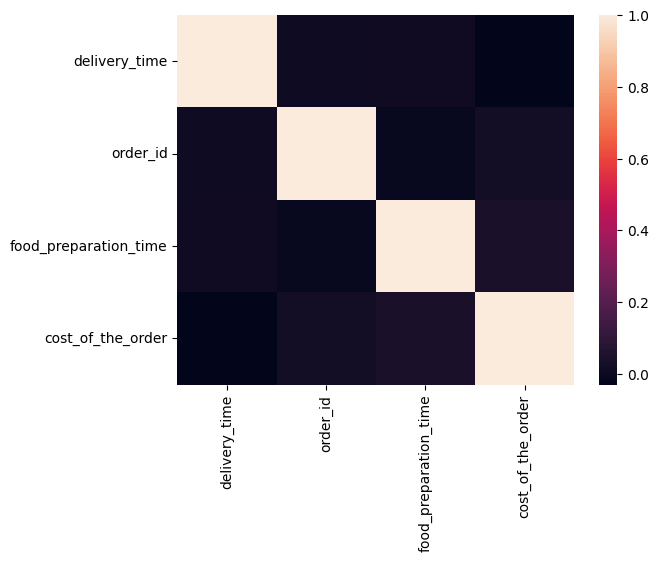

In [ ]:
sns.heatmap(data= df[['delivery_time', 'rating', 'order_id', 'restaurant_name', 'food_preparation_time','cuisine_type', 'cost_of_the_order', 'day_of_the_week',]].corr()); #looking at this, there is little to no correlation between these variables. "food_prep_time" and "delivery_time" have a small level of correlation.

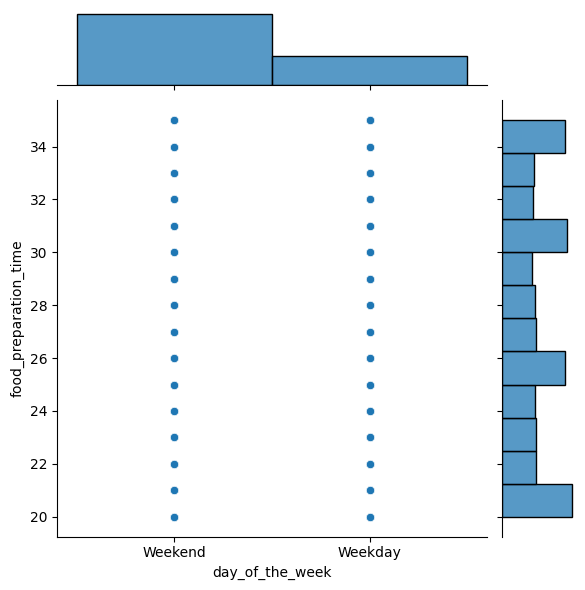

In [ ]:
sns.jointplot(df, x= 'day_of_the_week', y= 'food_preparation_time') #This jointplot helps us understand if there is a correlation between days of the week and food prep.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

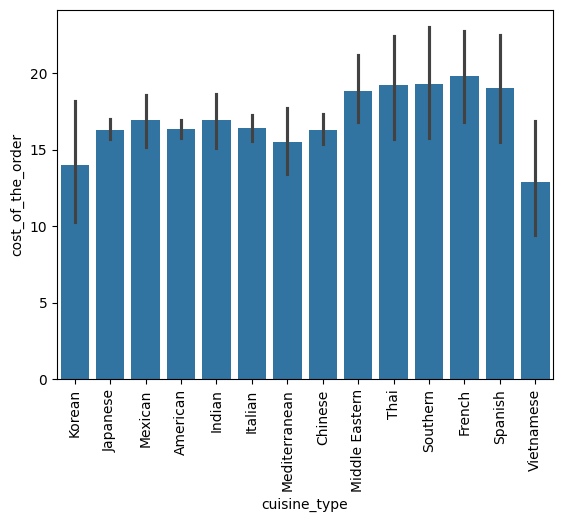

In [ ]:
sns.barplot(df, x= 'cuisine_type', y= 'cost_of_the_order',)
plt.xticks(rotation= 90) #This barplot shows us there is a small correlation in cost of the order and type of food

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

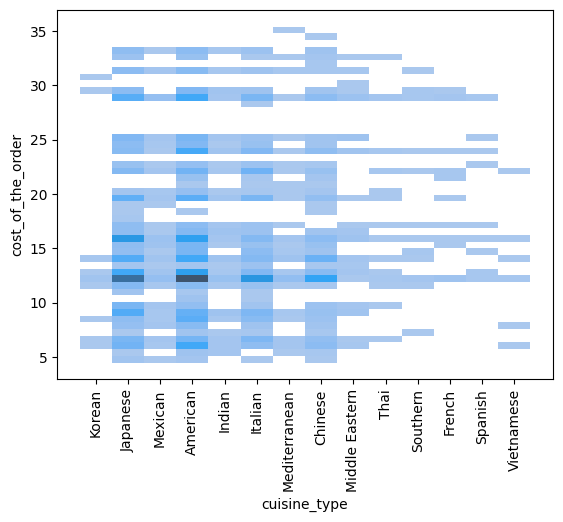

In [ ]:
#sns.histplot(df, x= 'cuisine_type', y= 'cost_of_the_order', bins=50, kde= True,)
#plt.xticks(rotation= 90) #this visualizes our data in a clean way showing me cuisine type and cost of the order to find a correlation between cost and the type of food

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#let's revisit the 'restaurant_name' histplot and try to clean it up.
#sns.histplot(df, y='restaurant_name', bins=5)
#plt.title('Restaurant Name')
#plt.xlim(40, 300)
#plt.ylim(20, 300)
#sns.violinplot(df, x='restaurant_name')
top_restaurants = df['restaurant_name'].value_counts().head(10) #find top 5 restaurants with .value_counts()
print(top_restaurants) #display results and draw conclusions
#1. Shake Shack has 219 orders, 2. Meatball Shop has 132 orders, 3. Blue Ribbon Sushi has 119 orders, 4. Blue Ribbon Fried Chicken has 96 orders (could be out oft he same 'ghost kitchen'), 5. Parm has 68 orders.

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

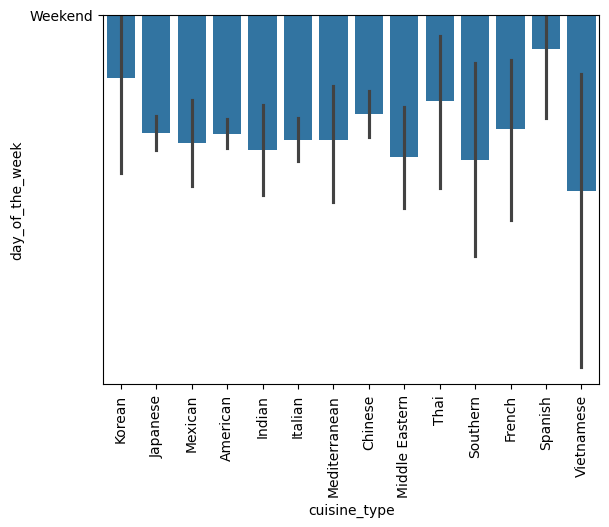

In [ ]:
#plot a comparison of 'day_of_the_week' and 'cuisine_type'
sns.barplot(df, y='day_of_the_week', x='cuisine_type')
plt.xticks(rotation=90) #Use barplot to sort the cuisines more cleanly, and we find that the most popular cuisine on weekends is 'Vietnamese'

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Look up the orders that cost > 20 dollars
df.loc[df['cost_of_the_order'] > 20] #there are 555 orders that cost over 20 dollars
#df['cost_of_the_order'].sum() #total of 'cost_of_the_order' columns
#df.info() #there are 1898 orders in the dataframe
percent_orders_over_twenty = (555/1898)
print(percent_orders_over_twenty) #Approximately 29% of the orders in this dataframe cost more than 20 dollars.

0.2924130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Use .mean()
df['delivery_time'].mean()
#the mean order delivery time is 24 minutes

24.161749209694417

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Find top customer_id's
#df['customer_id']
#sns.histplot(df, x='customer_id')
#plt.xticks(rotation=90)
top_customers = df['customer_id'].value_counts().head(5) #find top customers using .value_counts()
print(top_customers)
#top 3 customers are customer_id 52832 with 13 orders, customer_id 47440 with 10 orders, and customer id 83287 with 9 orders

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: xlabel='rating', ylabel='cost_of_the_order'>

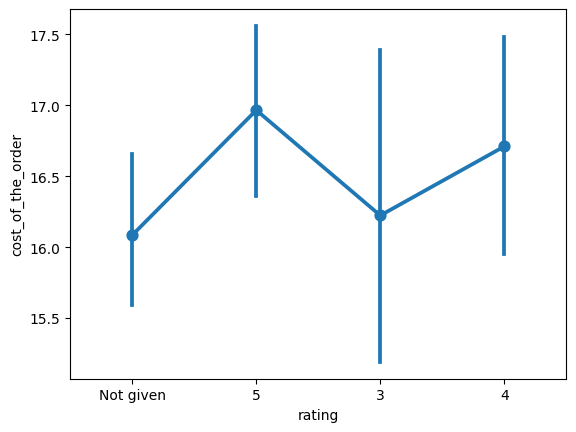

In [ ]:
#Let's investigate 'important relationships'
#cost of food and ratings using pointplot
sns.pointplot(df, x='rating', y='cost_of_the_order')
#sns.histplot(df, x='rating', y='cost_of_the_order') not as helpful

<Axes: xlabel='rating', ylabel='food_preparation_time'>

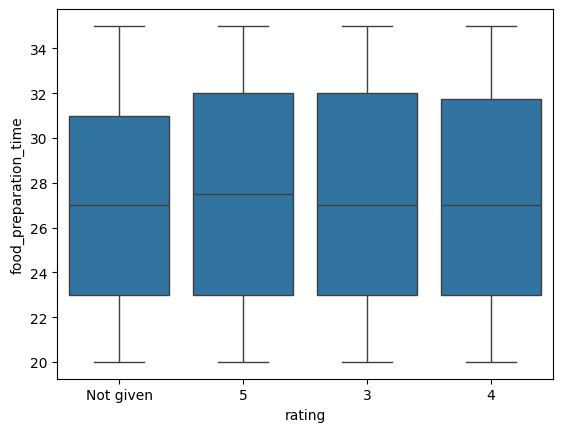

In [ ]:
#food prep time and ratings using boxplot seems cleanest
sns.boxplot(df, y='food_preparation_time', x='rating')

<Axes: xlabel='food_preparation_time', ylabel='delivery_time'>

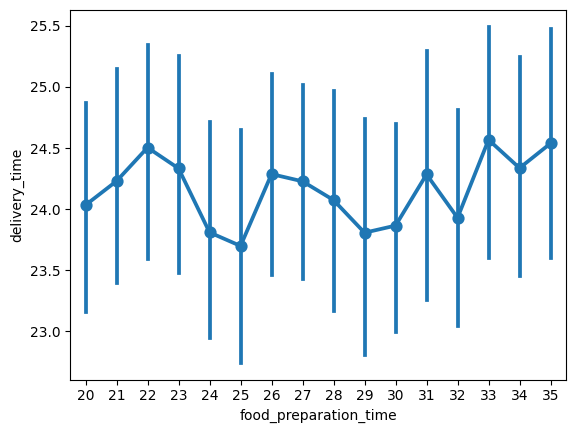

In [ ]:
#delivery time and food prep time using pointplot
sns.pointplot(df, x='food_preparation_time', y='delivery_time')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

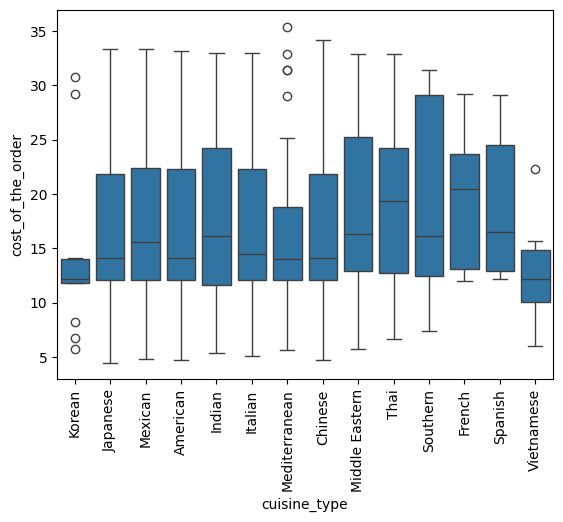

In [ ]:
#cuisine type and cost using boxplot
sns.boxplot(df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

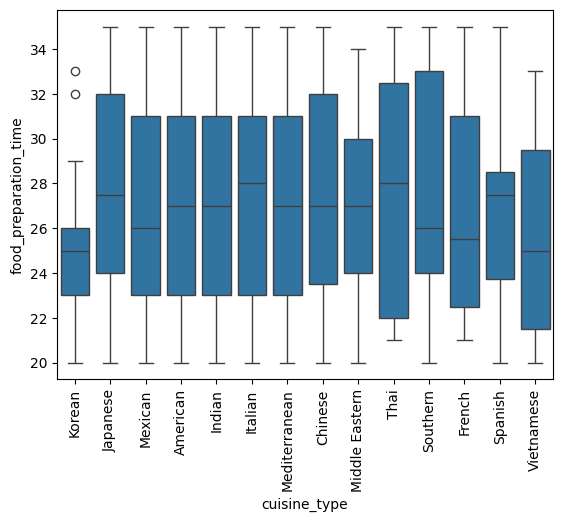

In [ ]:
#food prep time and cuisine type
sns.boxplot(df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

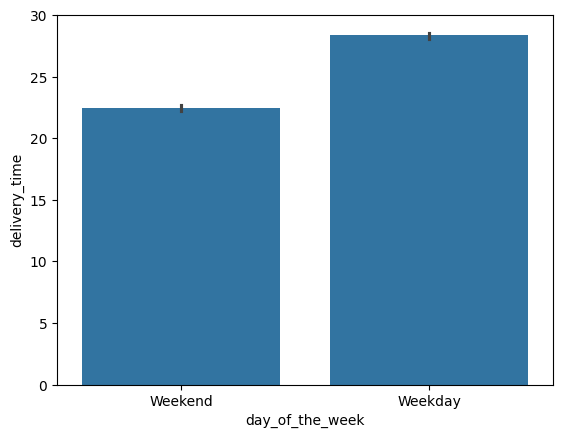

In [ ]:
#day of the week and delivery time using barplot
sns.barplot(df, x='day_of_the_week', y='delivery_time')

<Axes: xlabel='rating', ylabel='delivery_time'>

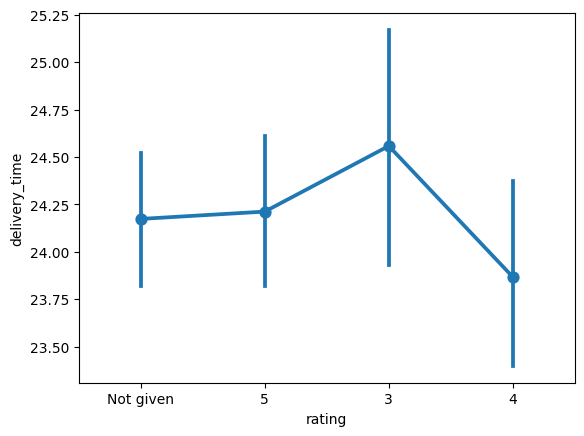

In [ ]:
#delivery time and rating using pointplot
sns.pointplot(df, y='delivery_time', x='rating')

In [ ]:
#restaurant earnings = total order for each restaurant, sorted
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(20)


restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

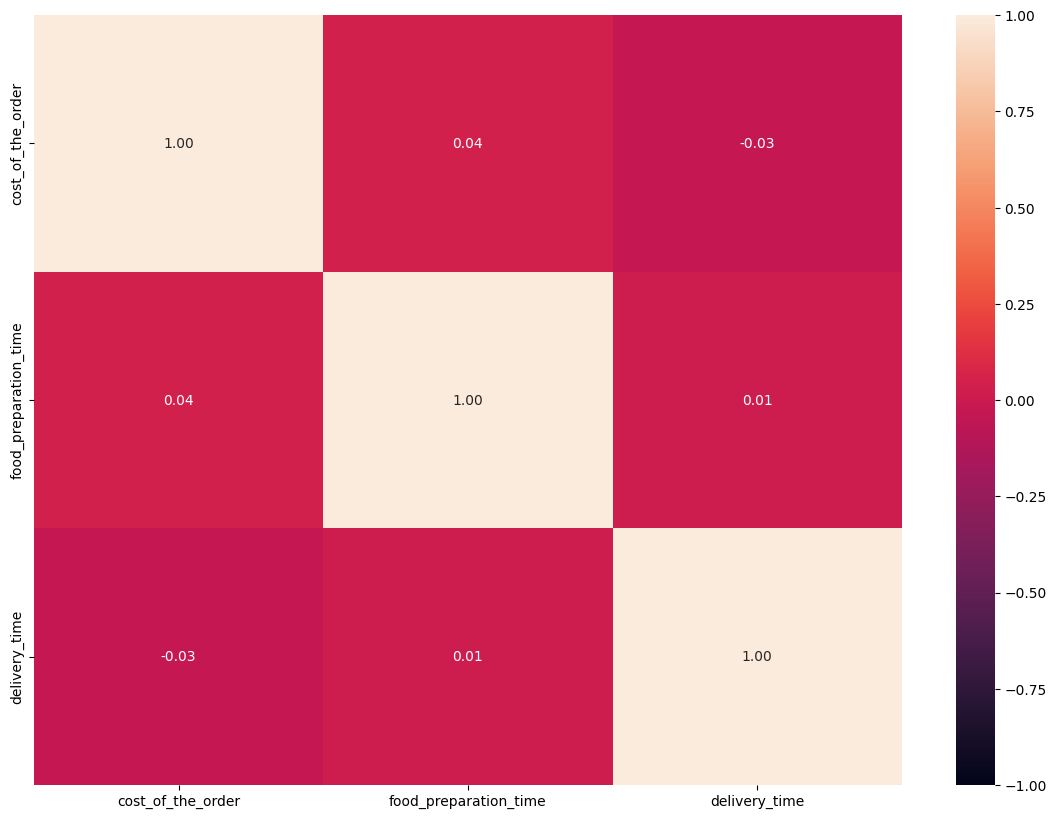

In [ ]:

#heatmap correlation of variables #heatmaps show us all correlation among variables in a clean and organized way
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(14, 10))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Find 'restaurant_name' with 'rating' of > 50 and average rating > 4.
#We should keep in mind that some entries in 'rating' are "not given".
#Let's filter the data
df_rated_rests = df[df['rating'] != 'Not given'].copy()
df_rated_rests['rating'] = df_rated_rests['rating'].astype('int') #conver types to int
#new dataframe where we groupby restaurant names and rating counts
df_count_ratings = df_rated_rests.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
#display top 5 restaurants with high rating count
df_count_ratings.head() #only four restaurants qualify for the discount for having over 50 ratings
#shake shack 133, meatball shop 84, blue ribbon sushi 73, blue ribbon fried chicken 64
rest_rating_over_fifty = df_count_ratings[df_count_ratings['rating']>50]['restaurant_name'] #new variable with only restaurants over 50 rating count
print(rest_rating_over_fifty)
#group restaurant names together by rating and find mean rating for each restaurant and drop all 'na' values
df_mean_restname = df_rated_rests[df_rated_rests['restaurant_name'].isin(rest_rating_over_fifty)].copy()
df_mean_restname.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna() #sort in ascending order of rating mean
#Meatball Shop has highest rating. Restaurants that qualify are teh same but the order changes.

#Meatball Shop has highest rating and Shake Shack has highest number of ratings. If the ad is to be successful in terms of ROI, go for these two restaurants more than the others because they are probably busier and more highly regarded.

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# We need a function for computing revenue based on criteria
def revenue(x):
  if x > 20:
    return x *.25
  elif x > 5:
    return x *.15
  else:
    return x*0

#Next, we need to find the net revenue from all orders
#create 'net_revenue' variable by updating 'cost_of_order' with revenue function
df['net_revenue']= df['cost_of_the_order'].apply(revenue)
#create function for total revenue using .sum()
total_rev = df['net_revenue'].sum()
print(f"The total revenue of the company is {total_rev}") #display total_rev


#total revenue is 6166.30 dollars approximately. We could use this with other data on company's cost of operations to understand its profitability


The total revenue of the company is 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# We need a total delivery time variable to store the result of calculation
df['total_delivery_time'] = df['delivery_time'] + df['food_preparation_time']
#find delivery times over 60 minutes
dt_over_sixty = df[df['total_delivery_time']>60]
print('The total number of orders taking more than 60 minutes to arrive is:', dt_over_sixty.shape[0]) #display total orders over 60 minutes
#200 orders over 60 minutes
#caclualte percentage
percent_calc = (dt_over_sixty.shape[0] / df.shape[0]) * 100
print('The percentage of orders that took over 60 minutes to be delivered is:', round(percent_calc, 2), '%')
#10.54% of orders took over 60 minutes

#This tells us that 89.46% of orders are arriving in under 60 minutes total. This means while there is room for improvement, we are in a good position. We could do this cacluation again for 45 minutes, 35 minutes, etc.
#We could identify if certain restaurants take longer than others and what cuisine type they prepare. We can look at customer_id and the typical size of their orders at that restaurant if we have that data. This could help us keep wait times down or explain them better to the 10% of customers affected by long waits.

The total number of orders taking more than 60 minutes to arrive is: 200
The percentage of orders that took over 60 minutes to be delivered is: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Let's write code to calculate mean delivery time on weekdays
del_time_wkday = df[df['day_of_the_week']== 'Weekday']['delivery_time'].mean()
print('The mean delivery time on weekdays is:', round(del_time_wkday))
#mean delivery time on weekdays 28 minutes

#let's repeat this code but for Weekend
del_time_wkend = df[df['day_of_the_week']== 'Weekend']['delivery_time'].mean()
print('The mean delivery time on weekends is:', round(del_time_wkend))
#mean delivery time on the weekend is 22 minutes

#The mean delivery time varies by 4 minutes on weekends compared to weekdays. This could be because there are more drivers out delivering orders. It could also be because restaurants usually have more staff on the weekends due to higher volume of orders online and in-store. They should investigate more if interested in reducing this variance.


The mean delivery time on weekdays is: 28
The mean delivery time on weekends is: 22


#### Observations:
 #Observations included throughout the code, but I would say that FoodHub definitely serves a lot of citizens in their location. There is a need to increase engagement in terms of ratings given. The company also has gaps in data. Where is the data on number of delivery drivers active each weekday and weekend? That would be helpful. What about data on time of day that things are ordered? Traffic will affect delivery times and could affect cost.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*The company needs more data on drivers, traffic, weather conditions, time of day that orders are placed, and how to utilize the information thatdifferent cuisine types take different times to prepare on average. This could also be used to explain to customers why some restaurants are slower on average than others and the company could buil alerts for this more easily.
The company has a large customer base with many customers ordering more than once a week, which is good. The potential revenue from promotional efforts seems appealing, but they need to provide more data to confirm this. If the costs of business are greater than the potential revenue generated from the discount effort, I'm not sure that's worth their time.

### Recommendations:

*  Study your drivers, your members, and your business partners for more specific data on ordering habits, prep time, and ratings. Investigate relationshisp between traffic patterns and surge hours/increased delivery times.
Think about raising prices on the weekend since orders are in higher volume and more drivers are out working. This could maximize revenue. And save the discounts for the weekdays when orders are down in volume and wait times are longer.

---